### `simulation.ipynb`
----------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import langevin as lg
import importlib

sim = lg.Langevin3D()

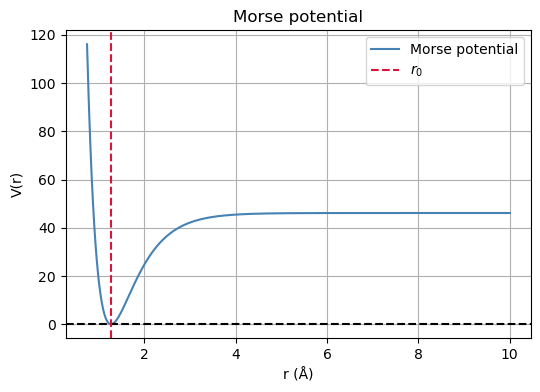

In [72]:
rv = np.linspace(0.75, 10, 1000)
pv = sim.potential_Morse(rv)

plt.figure(figsize=(6, 4))
plt.plot(rv, pv, label='Morse potential', color='steelblue')
plt.grid()
plt.axhline(0, color='black', lw=1.5, ls='--')
plt.axvline(sim.r_0, color='crimson', lw=1.5, ls='--', label=r'$r_0$')
plt.xlabel(r"r (Å)")
plt.ylabel("V(r)")
plt.title("Morse potential")
plt.legend(loc='upper right')

In [185]:
importlib.reload(lg)
sim = lg.Langevin3D(seed=1, T=0)
time, traj, speed = sim.run(n_steps=10000, r_init=sim.r_0, v_init=3e13, mode='langevin')
kinetic_e = sim.kinetic_energy(speed)
potential_e = sim.potential_Morse(traj)
total_e = np.array(kinetic_e) + np.array(potential_e)

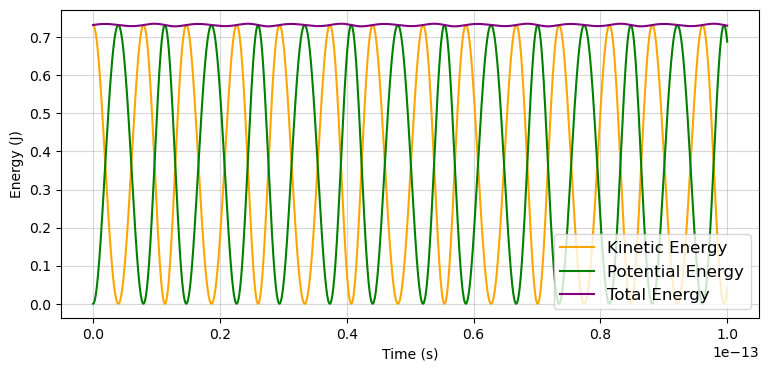

In [191]:
plt.figure(figsize=(9, 4))
plt.plot(time, kinetic_e, label='Kinetic Energy', color='orange')
plt.plot(time, potential_e, label='Potential Energy', color='green')
plt.plot(time, total_e, label='Total Energy', color='purple')
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.grid(True, alpha=0.5)
plt.legend(loc='lower right', fontsize=12)

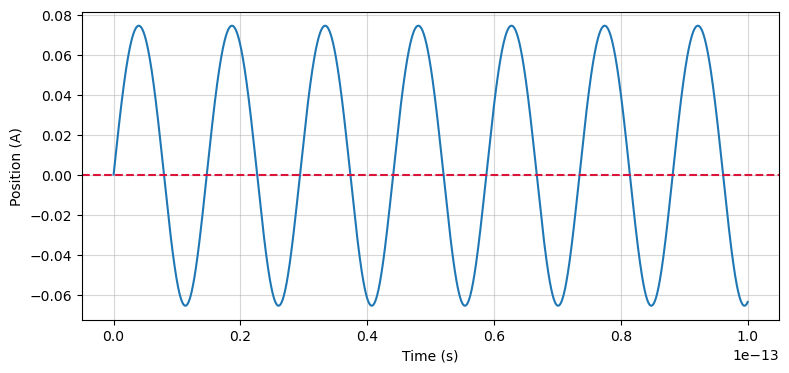

In [192]:
plt.figure(figsize=(9, 4))
plt.plot(time, traj-sim.r_0)
plt.axhline(0, color='crimson', lw=1.5, ls='--', label=r'$r_0$')
plt.xlabel("Time (s)")
plt.ylabel("Position (A)")
plt.grid(True, alpha=0.5)

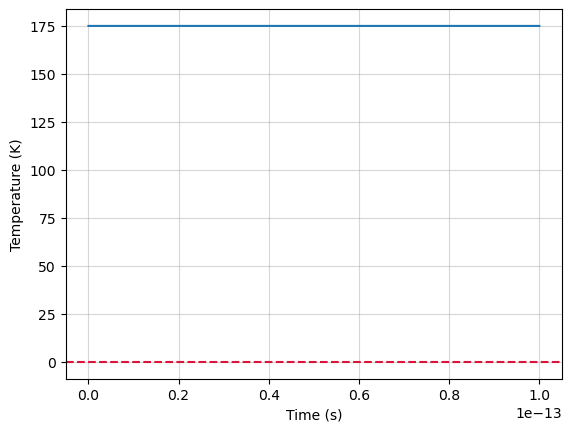

In [193]:
temp = sim.temperature(speed)
plt.plot(time, temp * np.ones_like(time))
plt.axhline(0, color='crimson', lw=1.5, ls='--', label=r'$r_0$')
plt.xlabel("Time (s)")
plt.ylabel("Temperature (K)")
plt.grid(True, alpha=0.5)

Text(0.5, 0, 'Z (Å)')

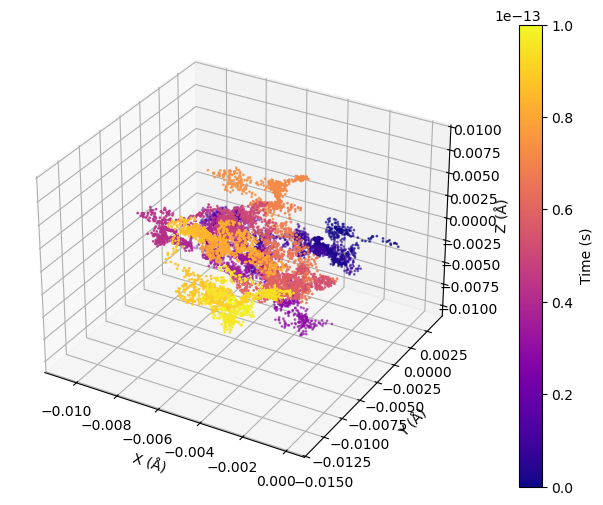

In [194]:
traj_3D, speed_3D = sim.v_to_trajectory(speed)
# do a 3D plot of the trajectory, coloring with the speed
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
time_array = np.arange(len(traj_3D)) * sim.dt
p = ax.scatter(traj_3D[:,0], traj_3D[:,1], traj_3D[:,2], cmap='plasma', c=time_array, s=1)
fig.colorbar(p, label='Time (s)')
ax.set_xlabel("X (Å)")
ax.set_ylabel("Y (Å)")
ax.set_zlabel("Z (Å)")